In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Load the data 

In [2]:
df = pd.read_csv("Data/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2786,6584-VQMYT,Male,0,No,Yes,27,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Mailed check,56.20,1567.55,No
4928,2718-GAXQD,Female,1,Yes,Yes,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,46.00,181.6,Yes
655,5183-SNMJQ,Male,0,No,No,10,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.10,865.1,No
3203,5879-HMFFH,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),88.05,6520.8,No
711,7929-DMBCV,Female,0,Yes,No,20,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,81.00,1683.7,No


First of all, drop customerID column as it is of no use 

In [3]:
df.drop('customerID',axis='columns',inplace=True)

Convert object into integer

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [10]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

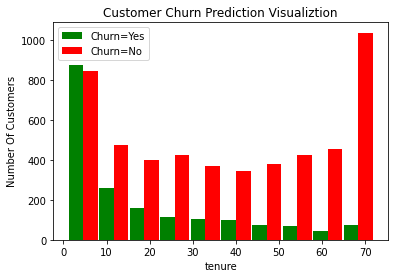

In [11]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [12]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [13]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [14]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [15]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [16]:
df.replace({'Yes': 1, 'No': 0}, inplace = True)

In [17]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [18]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [19]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [20]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
5,1,0,0,0,8,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
6,0,0,0,1,22,1,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
7,1,0,0,0,10,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
8,1,0,1,0,28,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
9,0,0,0,1,62,1,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0


In [21]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [22]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [23]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [24]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.5016 - accuracy: 0.7611
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.7959
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8023
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8059
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8098
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8103
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8119
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8100
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8137
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4030 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8331
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8370
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8352
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8382
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8363
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8375
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8386
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8368
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8352
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 

In [25]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 2ms/step - loss: 0.4864 - accuracy: 0.7662


[0.48644429445266724, 0.7661691308021545]

# Use Dropout for better evaluation.
this drop out random neurons and enhance the model and save it from overfitting.

In [29]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5977 - accuracy: 0.7287
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.7486
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7495
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7604
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4685 - accuracy: 0.7637
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7705
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.7749
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4515 - accuracy: 0.7813
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.7780
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4439 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8011
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.7991
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8025
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.7986
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.7957
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.7988
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.7966
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.7968
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.7947
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 

In [30]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.7854


[0.4445839524269104, 0.7853589057922363]